In [80]:
import pandas as pd
from openai import OpenAI
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from ast import literal_eval
import matplotlib.cm as cm  # For a colormap

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [113]:
df = pd.read_csv('./captions.csv')

c:\Users\rohan\anaconda3\envs\three\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [62]:
client = OpenAI(api_key=os.getenv('OPENAI_API_KEY'))
embedding_model = "text-embedding-3-small"
def get_embedding(text, model=embedding_model):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], model=model).data[0].embedding
df['Embedding'] = df['Caption'].apply(lambda x: get_embedding(x, model='text-embedding-3-small'))
df.to_csv('./embedding.csv', index=False)

In [134]:
df = pd.read_csv('./embedding.csv')
df['embedding'] = df['Embedding'].apply(eval).apply(np.array)
print((df['embedding'][0]))
# a = get_embedding("hi", model=embedding_model)
# print(a)

[ 0.00770521  0.01015303  0.01682123 ... -0.00486248  0.01756884
 -0.01158796]


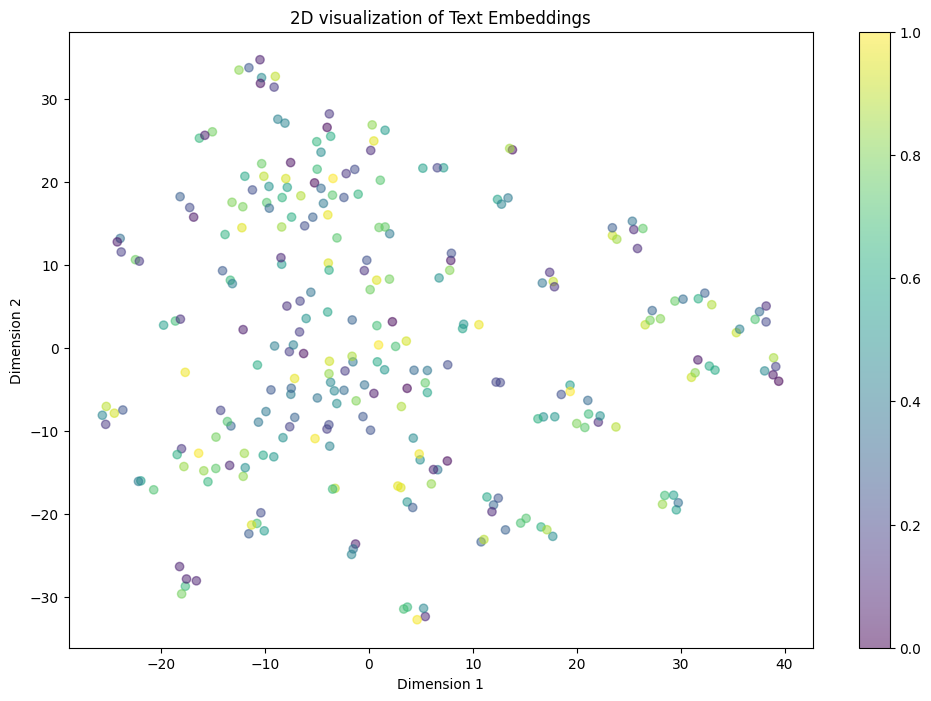

In [153]:
# Load the embeddings
datafile_path = "./embedding.csv"
df = pd.read_csv(datafile_path)
subclasses = df['Subclass']
# Convert to a list of lists of floats
matrix = np.array(df['Embedding'].apply(literal_eval).to_list())

# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix)
unique_subclasses = np.unique(subclasses)
subclass_map = {label: idx for idx, label in enumerate(unique_subclasses)}
color_labels = subclasses.map(subclass_map)  # Convert labels to integers
# Normalize your labels to be between 0 and 1
color_labels = (color_labels - color_labels.min()) / (color_labels.max() - color_labels.min())

cmap = cm.viridis
# Plot the results
plt.figure(figsize=(12, 8))
scatter = plt.scatter(vis_dims[:, 0], vis_dims[:, 1], alpha=0.5, cmap=cm.viridis, c=color_labels)
plt.colorbar(scatter)  # Show color scale
plt.title('2D visualization of Text Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()